In [29]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve



import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [2]:
x_data = np.array( [[25.8],[26.6],[28.1],[29.0],[30.5],
                    [31.0],[33.6],[39.3],[43.3],[45.8] ] )
y_data = np.array( [[1],[0],[0],[1],[1],[1],[1],[0],[0],[1]  ] )

In [3]:
df = pd.DataFrame( x_data, columns=['BMI'] )
df['당뇨여부'] = y_data
df

,BMI,당뇨여부
0,25.8,1
1,26.6,0
2,28.1,0
3,29.0,1
4,30.5,1
5,31.0,1
6,33.6,1
7,39.3,0
8,43.3,0
9,45.8,1


## confusion matrix

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

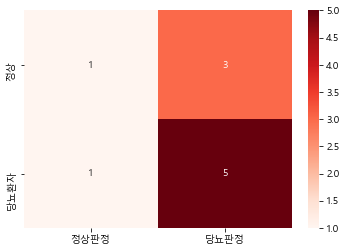

In [5]:
y_pred = [0,0,1,1,1,1,1,1,1,1] #판정
#y_data =[1,0,0,1,1,1,1,0,0,1  ] )
cm = confusion_matrix( y_data, y_pred )
# cm
sns.heatmap( cm, annot=True, cmap='Reds', yticklabels=['정상','당뇨환자'],
            xticklabels=['정상판정', '당뇨판정'])
plt.show()

In [6]:
#정밀도
precision_score( y_data, y_pred )

0.625

In [7]:
#재현율
recall_score( y_data, y_pred) 

0.8333333333333334

In [8]:
f1_score( y_data, y_pred )

0.7142857142857143

## 팀별로 confusion matrix, precision, recall, f1 score 에 대해 정리하겠습니다. 55분까지

조화평균사용이유: precision과 recall이 0 에 가까울수록 동일한 비율로 
F1 score도 동일하게 낮은 값을 갖도록 하기 위함

<img src="images/f1_jowha1.png">

피마인디안 데이터를 이용하여 confusion matrix(heat mat), 
precision, recall, f1 score  를 구하시요. (train test)

In [9]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)
# train
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

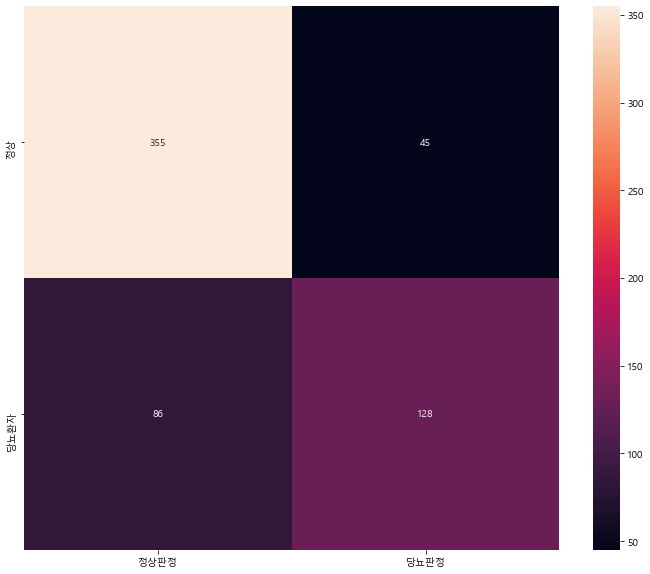

precision :  0.7398843930635838
recall :  0.5981308411214953
f1 score :  0.6614987080103358


In [10]:
y_train_pred = model_lr.predict(x_train)

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm_train, annot = True,fmt='d', yticklabels = ['정상', '당뇨환자'], xticklabels = ['정상판정', '당뇨판정'])
plt.show()

ps = precision_score(y_train, y_train_pred)
rs = recall_score(y_train, y_train_pred)
f1score = (2 * ps * rs) / (ps + rs)
print('precision : ', precision_score(y_train, y_train_pred))
print('recall : ', recall_score(y_train, y_train_pred))
print('f1 score : ', f1score)

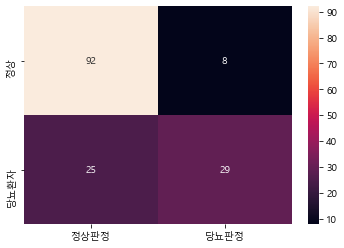

precision :  0.7837837837837838
recall :  0.5370370370370371
f1 score :  0.6373626373626374


In [11]:
# test
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)
y_test_pred = model_lr.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(cm_train, annot = True, yticklabels = ['정상', '당뇨환자'], xticklabels = ['정상판정', '당뇨판정'])
plt.show()

ps = precision_score(y_test, y_test_pred)
rs = recall_score(y_test, y_test_pred)
f1score = (2 * ps * rs) / (ps + rs)
print('precision : ', precision_score(y_test, y_test_pred))
print('recall : ', recall_score(y_test, y_test_pred))
print('f1 score : ', f1score)

In [12]:
np.linspace(0,1, 50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [13]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)

In [14]:
model_logistic = make_pipeline( StandardScaler(), LogisticRegression() )
param_value = {'logisticregression__C': np.linspace(0,1, 10),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model_logistic, param_grid = param_value,
                    scoring='f1' )  # accuracy
gridS.fit(x_train, y_train)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalt

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', 'none'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']},
             scoring='f1')

In [15]:
gridS.best_params_

{'logisticregression__C': 0.1111111111111111,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [16]:
gridS.best_score_ # 정확도

0.646370349529018

In [17]:
y_predict = gridS.best_estimator_.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [18]:
f1_score(y_test, y_predict)

0.6304347826086957

### ROC(Receiver Operating Characteristic) curve는 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것

In [20]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [21]:
p = model_lr.predict_proba(x_test)
p

array([[0.92550508, 0.07449492],
       [0.83320429, 0.16679571],
       [0.95656634, 0.04343366],
       [0.54861033, 0.45138967],
       [0.70967189, 0.29032811],
       [0.77235432, 0.22764568],
       [0.96908426, 0.03091574],
       [0.90230655, 0.09769345],
       [0.22348191, 0.77651809],
       [0.95068943, 0.04931057],
       [0.7832609 , 0.2167391 ],
       [0.94535595, 0.05464405],
       [0.24730158, 0.75269842],
       [0.9697421 , 0.0302579 ],
       [0.95025231, 0.04974769],
       [0.71092943, 0.28907057],
       [0.727385  , 0.272615  ],
       [0.48200272, 0.51799728],
       [0.85271205, 0.14728795],
       [0.30629606, 0.69370394],
       [0.24898721, 0.75101279],
       [0.91382662, 0.08617338],
       [0.56698805, 0.43301195],
       [0.9694643 , 0.0305357 ],
       [0.76706131, 0.23293869],
       [0.82341565, 0.17658435],
       [0.52886238, 0.47113762],
       [0.91351072, 0.08648928],
       [0.95105008, 0.04894992],
       [0.93233714, 0.06766286],
       [0.

In [22]:
df = pd.DataFrame([y_test])
df = df.T  # 데이터 프레임으로 돌려줌
df
# df['proba'] = p[:,1]

,Outcome
488,0
413,0
112,0
222,0
711,0
...,...
139,0
178,0
654,0
110,1


In [23]:
# 컬럼 하나 추가
df['proba'] = p[:,1]
df

,Outcome,proba
488,0,0.074495
413,0,0.166796
112,0,0.043434
222,0,0.451390
711,0,0.290328
...,...,...
139,0,0.179818
178,0,0.746856
654,0,0.096614
110,1,0.548493


In [25]:
# df정렬
df.sort_values(by='proba')

,Outcome,proba
75,0,0.001900
342,0,0.003470
494,0,0.008932
106,0,0.014999
9,1,0.027928
...,...,...
215,1,0.910532
715,1,0.921489
744,0,0.939968
154,1,0.959321


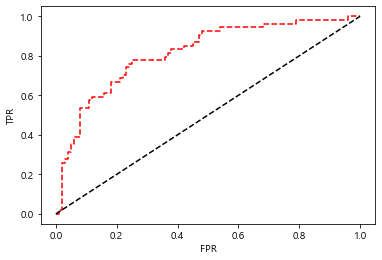

In [32]:
# y_true, 실제값
# y_score, 확률값
# roc_curve(y_test, p[:,1])
fpr, tpr, thresholds = roc_curve(y_test, df['proba'].values)
# print( fpr)
# print(tpr)
# print(thresholds) # 판정기준치, 
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
# 분류가 잘 될수록 커브가 위쪽으로 위치, 모델의 성능을 평가하는 지표 : roc_curve

https://angeloyeo.github.io/2020/08/05/ROC.html
